# Supervised-Wisconsin Diagnostic Breast Cancer (WDBC)

Diagnostico de cancer de piel a partir de descriptores obtenidos de imagenes de manchas y lunares

http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

---
## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## cargar BD y labels

In [7]:
X_train=np.loadtxt('./data/data_train.txt')
y_train=np.loadtxt('./data/labels_train.txt')

X_test=np.loadtxt('./data/data_test.txt')
y_test=np.loadtxt('./data/labels_test.txt')
print(X_train.shape, X_test.shape)

(448, 30) (112, 30)


Se tienen 560 muestras y 30 características extraidas de imagenes de lunares http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

---
Las características incluyen


1. Radio del lunar
+ Textura
+ Perimetro
+ Area
+ Forma
+ Compactación
+ Concavidad
+ Puntos de concavidad
+ Simetria
+ Dimensión Fractal

La media, desviación, estándar, y máximo de estos 10 descritpreos es calculada, formando las 30 características
    




## Pre-procesamiento de los datos

In [8]:
from sklearn.preprocessing import StandardScaler

# estandarizar los datos en magnitud (media cero y varianza 1)
st=StandardScaler()


X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)

## Regresion Logistica

In [9]:
from sklearn.linear_model import LogisticRegression

# Se instancia el modelo de regresion logistica
logreg = LogisticRegression()

# Se entrena la regresion logistica con los datos de entreamiento
logreg.fit(X_train, y_train)

# Se predicen los valores en el conjunto de test
y_pred=logreg.predict(X_test)

# Se evalua el desempeño de la regresion logistica

from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, y_pred)
print('accuracy score=', acc*100, '%')

accuracy score= 98.2142857143 %


## Si se quiere visualizar el resultado se reduce el numero de caracteristicas a 2 usando PCA

In [10]:
from sklearn.decomposition import PCA

pcaT=PCA(n_components=2)
X_train2=pcaT.fit_transform(X_train)
X_test2=pcaT.transform(X_test)

print(X_train2.shape, X_test2.shape)

# Se instancia el modelo de regresion logistica
logreg2 = LogisticRegression()

# Se entrena la regresion logistica con los datos de entreamiento
logreg2.fit(X_train2, y_train)

# Se predicen los valores en el conjunto de test
y_pred2=logreg2.predict(X_test2)

# Se evalua el desempeño de la regresion logistica

acc2=accuracy_score(y_test, y_pred2)
print('accuracy score=', acc*100, '%')

(448, 2) (112, 2)
accuracy score= 98.2142857143 %


### Grafica frontera de decision


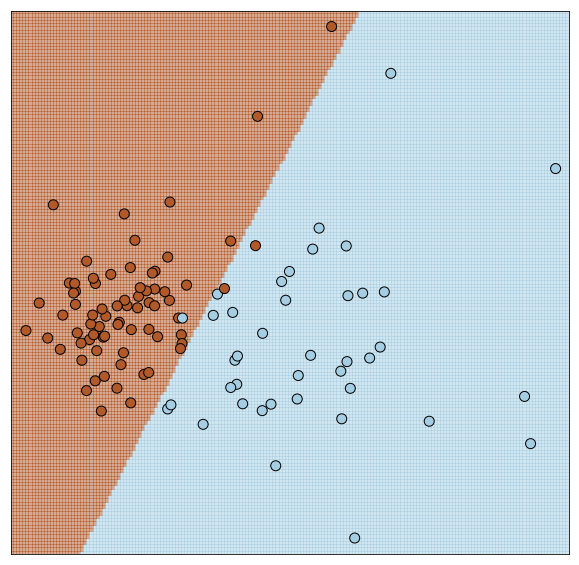

In [11]:
h = .1
x_min, x_max = X_test2[:, 0].min() - .5, X_test2[:, 0].max() + .5
y_min, y_max = X_test2[:, 1].min() - .5, X_test2[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# Plot also the training points
plt.scatter(X_test2[:, 0], X_test2[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, s=100)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Arbol de decision

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Se instancia el modelo de regresion logistica
DT = DecisionTreeClassifier()

# Se entrena la regresion logistica con los datos de entreamiento
DT.fit(X_train, y_train)

# Se predicen los valores en el conjunto de test
y_pred=DT.predict(X_test)

# Se evalua el desempeño de la regresion logistica

acc=accuracy_score(y_test, y_pred)
print('accuracy score=', acc*100, '%')

accuracy score= 95.5357142857 %


## Grafica de la frontera de decision

accuracy score= 95.5357142857 %


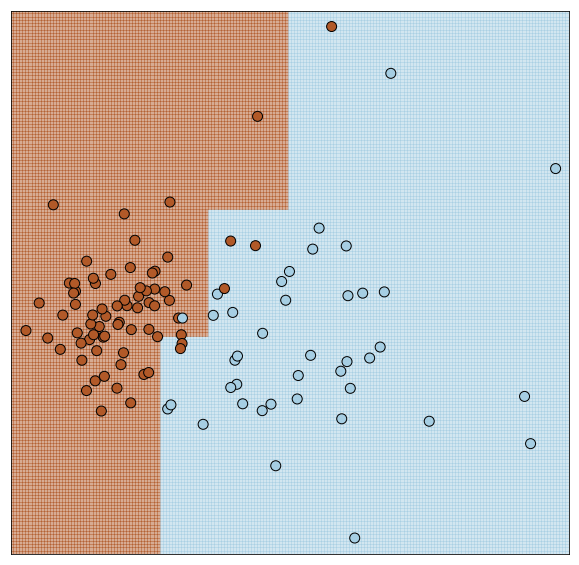

In [13]:

# Se instancia el modelo de regresion logistica
DT2 = DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=10,max_leaf_nodes=20)

# Se entrena la regresion logistica con los datos de entreamiento
DT2.fit(X_train2, y_train)

# Se predicen los valores en el conjunto de test
y_pred2=DT2.predict(X_test2)

# Se evalua el desempeño de la regresion logistica

acc2=accuracy_score(y_test, y_pred2)
print('accuracy score=', acc*100, '%')


h = .1
x_min, x_max = X_test2[:, 0].min() - .5, X_test2[:, 0].max() + .5
y_min, y_max = X_test2[:, 1].min() - .5, X_test2[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = DT2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# Plot also the training points
plt.scatter(X_test2[:, 0], X_test2[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, s=100)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Maquina de soporte vectorial: lineal

In [14]:
from sklearn import svm
# Se instancia el modelo
lin_svc = svm.LinearSVC()

# Se entrena la regresion logistica con los datos de entreamiento
lin_svc.fit(X_train, y_train)

# Se predicen los valores en el conjunto de test
y_pred=lin_svc.predict(X_test)

# Se evalua el desempeño de la regresion logistica

acc=accuracy_score(y_test, y_pred)
print('accuracy score=', acc*100, '%')

accuracy score= 97.3214285714 %


## SVM: grafica frontera de decision

accuracy score= 97.3214285714 %


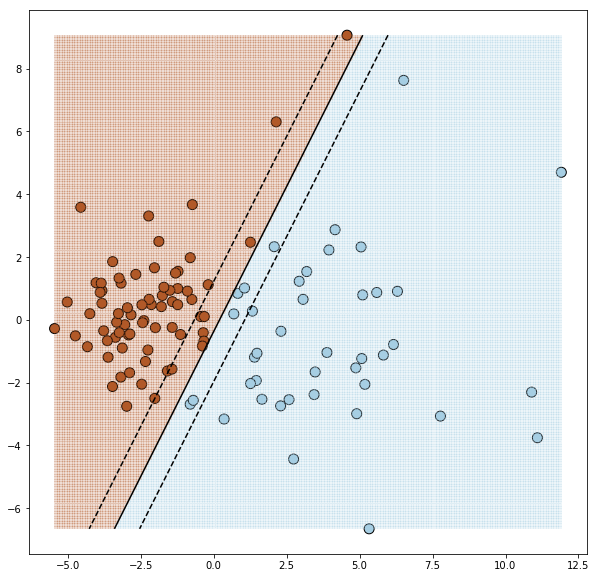

In [15]:

# Se instancia el modelo de regresion logistica
lin_svc = svm.LinearSVC()
# Se entrena la regresion logistica con los datos de entreamiento
lin_svc.fit(X_train2, y_train)

# Se predicen los valores en el conjunto de test
y_pred2=lin_svc.predict(X_test2)

# Se evalua el desempeño de la regresion logistica

acc2=accuracy_score(y_test, y_pred2)
print('accuracy score=', acc*100, '%')


plt.figure(1, figsize=(10,10))

Z=lin_svc.predict(X_test2)
        #plt.scatter(X_test[:, 0], X_test[:, 1], c=Z, cmap=plt.cm.Paired,edgecolors='k', s=80)
plt.scatter(X_test2[:, 0], X_test2[:, 1], c=Z, cmap=plt.cm.Paired,edgecolors='k', s=100)

# grafica del hiperplano de separacion
x_min=np.min(X_test2[:, 0])
x_max=np.max(X_test2[:, 0])
y_min=np.min(X_test2[:, 1])
y_max=np.max(X_test2[:, 1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z2 = lin_svc.decision_function(np.c_[XX.ravel(), YY.ravel()])
# Put the result into a color plot
Z2 = Z2.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z2 > 0, cmap=plt.cm.Paired, alpha=0.2)
plt.contour(XX, YY, Z2, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.show()

## SVM: grafica frontera de decision no lineal

accuracy score= 97.3214285714 %


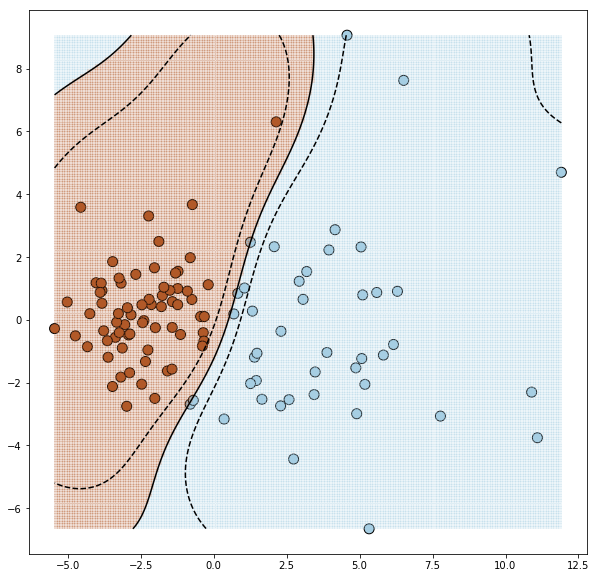

In [20]:
# Se instancia el modelo de regresion logistica
lin_svc = svm.SVC(kernel='rbf', gamma=0.1)
# Se entrena la regresion logistica con los datos de entreamiento
lin_svc.fit(X_train2, y_train)

# Se predicen los valores en el conjunto de test
y_pred2=lin_svc.predict(X_test2)

# Se evalua el desempeño de la regresion logistica

acc2=accuracy_score(y_test, y_pred2)
print('accuracy score=', acc*100, '%')

plt.figure(1, figsize=(10,10))

Z=lin_svc.predict(X_test2)
        #plt.scatter(X_test[:, 0], X_test[:, 1], c=Z, cmap=plt.cm.Paired,edgecolors='k', s=80)
plt.scatter(X_test2[:, 0], X_test2[:, 1], c=Z, cmap=plt.cm.Paired,edgecolors='k', s=100)

# grafica del hiperplano de separacion
x_min=np.min(X_test2[:, 0])
x_max=np.max(X_test2[:, 0])
y_min=np.min(X_test2[:, 1])
y_max=np.max(X_test2[:, 1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z2 = lin_svc.decision_function(np.c_[XX.ravel(), YY.ravel()])
# Put the result into a color plot
Z2 = Z2.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z2 > 0, cmap=plt.cm.Paired, alpha=0.2)
plt.contour(XX, YY, Z2, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.show()